# Funcitonal example for lume-belt

In [1]:

from belt.belt_distgen import run_belt_with_distgen, evaluate_belt_with_distgen
import h5py
import os

# Nicer plotting

import matplotlib
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

In [2]:
gfile = './example1/image.in.yaml'
belt_config = {"input": "example1/belt.in", "workdir": os.environ.get('SCRATCH'), "command": '/sdf/group/ad/sw/beta/bin/xbelt'}

# Functional run_belt_with_distgen

In [3]:
# Make some changes to the initial setting
SETTINGS0 = {
    'distgen:n_particle':10000,
    'BC1:angle': 0.09962502193*0.94 }


In [4]:
E = run_belt_with_distgen(
    settings=SETTINGS0,
    distgen_input_file=gfile,
    belt_config=belt_config,
)


<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

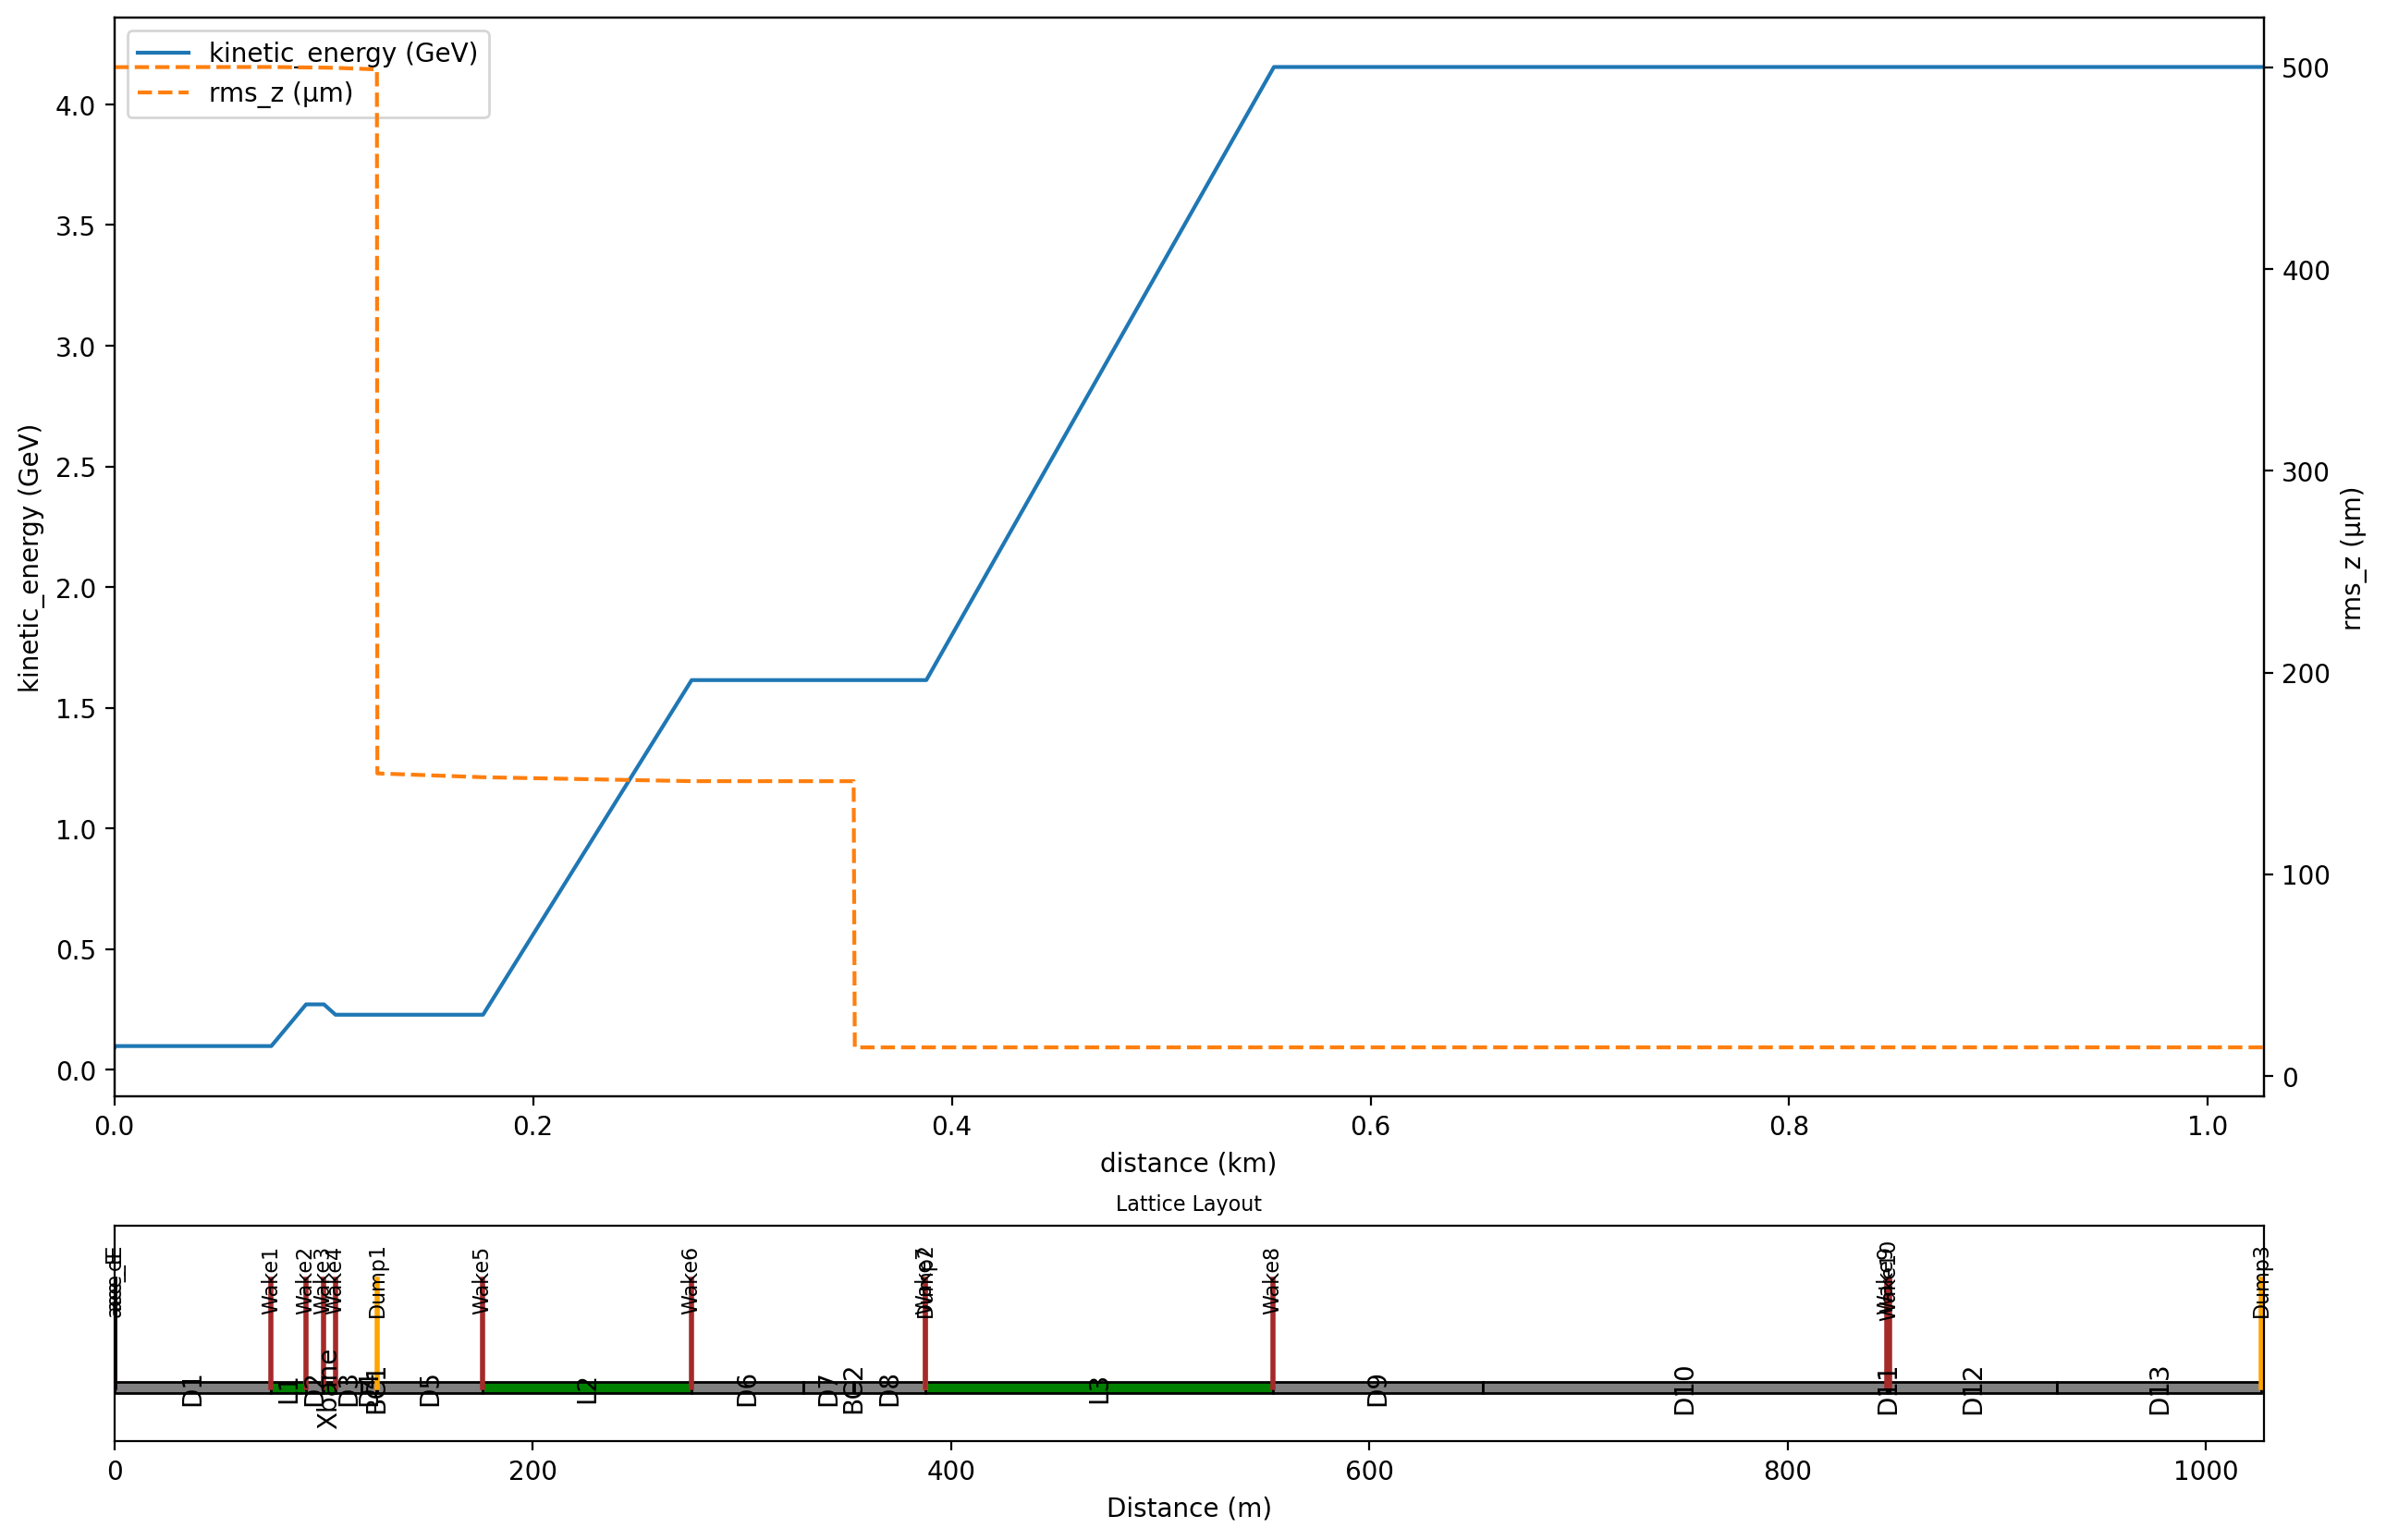

In [5]:
E.plot()

In [7]:
h5file = './test.h5'
E.archive(h5file)

In [8]:
with h5py.File(h5file, 'r') as h5:
    print(list(h5))

['input', 'output']


In [9]:
with h5py.File(h5file, 'r') as h5:
    print(h5.keys())
    E.from_archive(h5)
 

<KeysViewHDF5 ['input', 'output']>


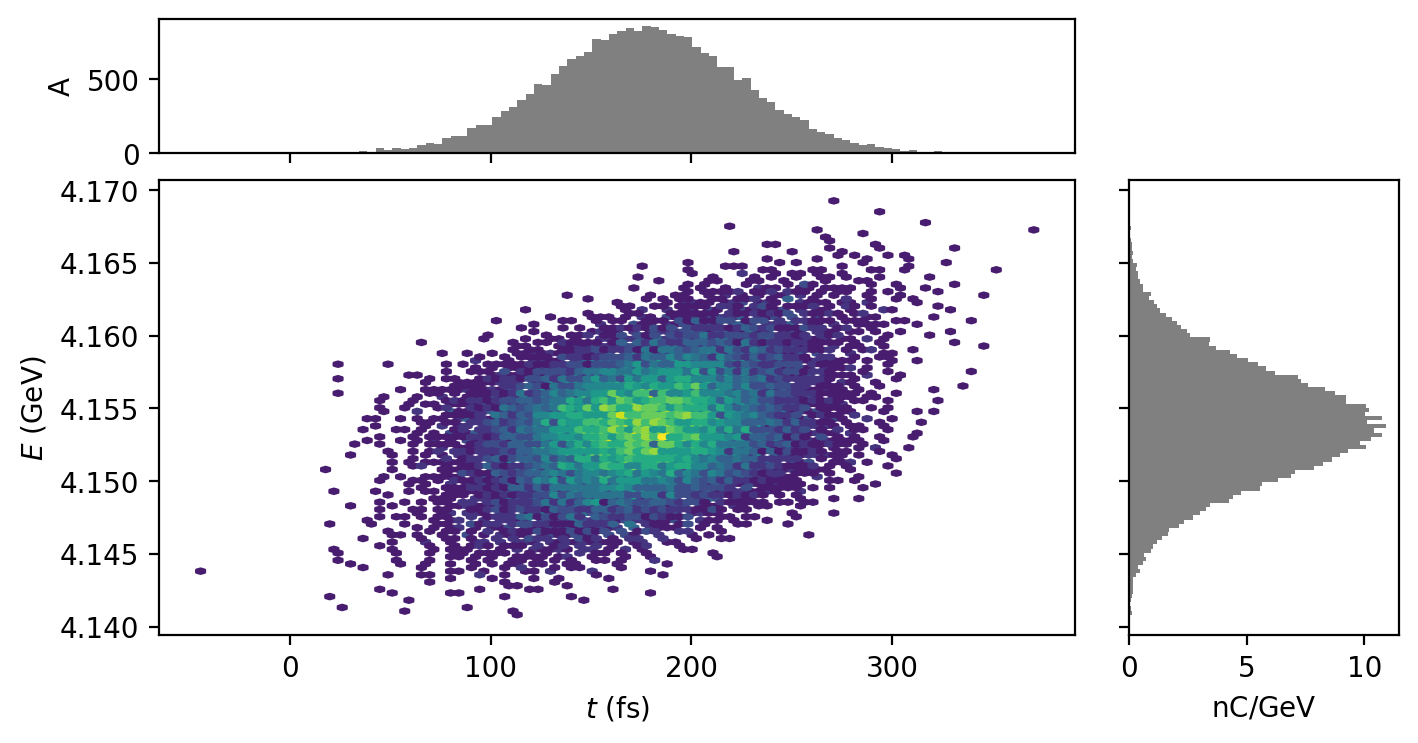

In [10]:
# Final particles
E.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy')

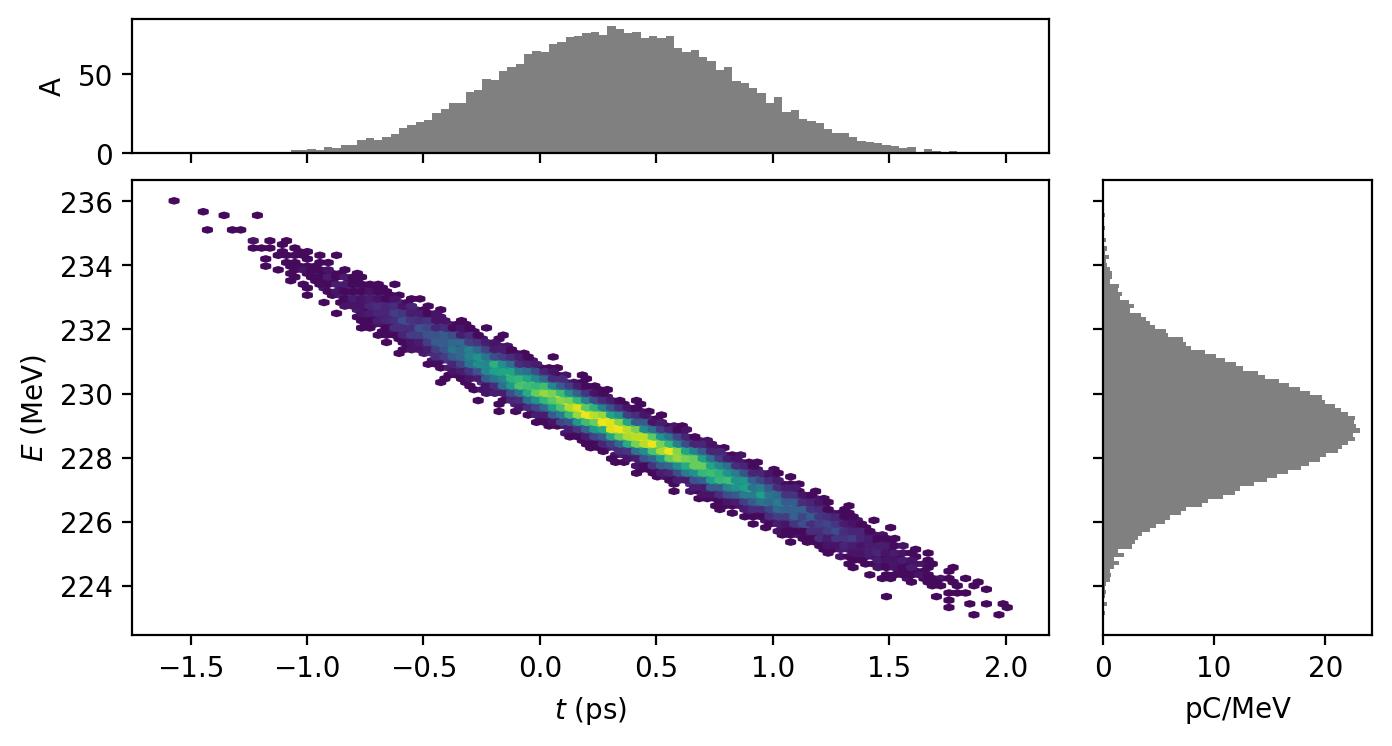

In [11]:
# After BC1
E.output.plot_distribution(file_id = 211, xkey = 't', ykey = 'energy')

# Functional evaluate_belt_with_distgen

In [12]:
# This returns an BELT object that has run
O1 = evaluate_belt_with_distgen(
    belt_config=belt_config,
    settings = SETTINGS0,
  
    distgen_input_file=gfile,
   
    archive_path = '.'
)

# This is the default output
O1

{'error': False,
 'end_kinetic_energy': np.float64(4155053600.0),
 'end_gamma': np.float64(8132.1408),
 'end_mean_z': np.float64(5.30735072e-05),
 'end_rms_z': np.float64(1.42416419e-05),
 'end_mean_delta_gamma': np.float64(-3.23830882),
 'end_rms_delta_gamma': np.float64(7.58871476),
 'run_time': 0.6355463461950421,
 'end_n_particle_loss': 0,
 'end_total_charge': np.float64(9.999999999999999e-11),
 'end_higher_order_energy_spread': np.float64(3559512.848380195),
 'fingerprint': 'c157a2bce77aa9b60e9df03ba54ebaaa',
 'archive': '/sdf/data/ad/ard/u/jytang/lume-belt/docs/examples/c157a2bce77aa9b60e9df03ba54ebaaa.h5'}